# MTpy Example 10

## Phase Tensor Pseudosections

A pseudosection plot distance on the x-axis and period on the y-axis.  Phase tensor ellipses are plotted for each station at each period measured.  This provides a plot that is an proxy for structures at depth. The ellipses and induction vectors are plotted in map view, so up is North and to the right is East.  

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib inline

2022-10-15 11:48:02,175 [line 135] error.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\mtpy_error.log
2022-10-15 11:48:02,178 [line 135] matplotlib.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\matplotlib_warn.log
2022-10-15 11:48:09,267 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log


### Open MTCollection

In the previous example we created a MTH5 file from existing Yellowstone data.  Let's open that file here for plotting.

In [2]:
mc = MTCollection()
mc.open_collection(Path().cwd().parent.parent.joinpath("data", "transfer_functions", "yellowstone_mt_collection.h5"))

## Plot Phase Tensor Pseudosection for the Snake River Plane stations

Since the DeGroot-Hedlin Snake River Plane line was collected with 2D modeling in mind, lets use that for an example.  

In [3]:
%%time
mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.str.startswith("SR2")]
dgh_mt_data = mc.to_mt_data()

Wall time: 27.1 s


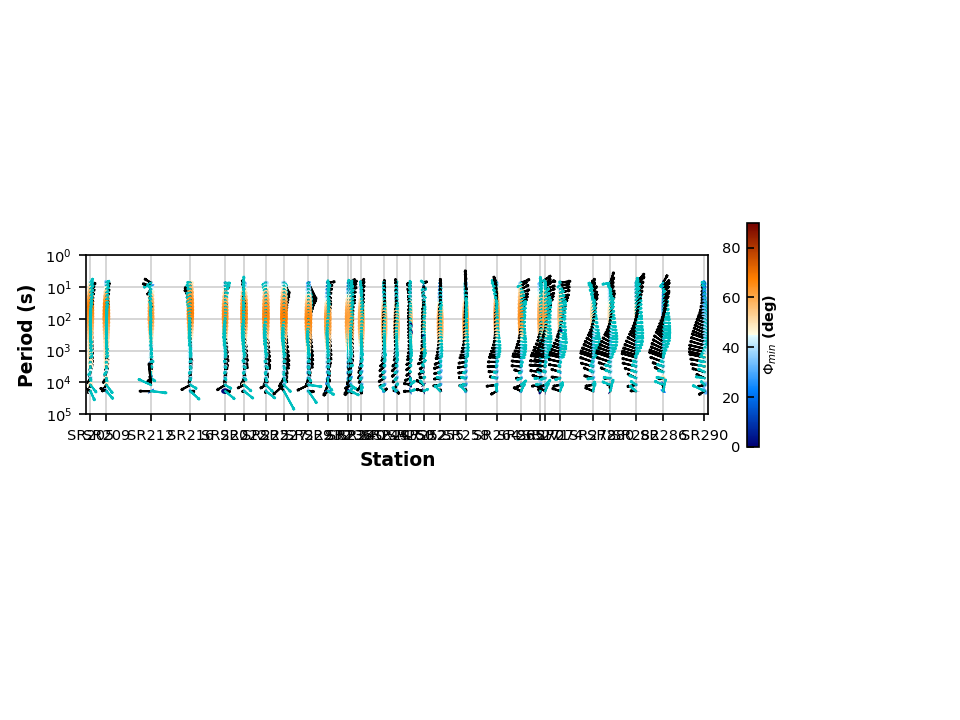

In [4]:
plot_pt_pseudosection = dgh_mt_data.plot_phase_tensor_pseudosection( 
    plot_tipper="yri", 
    fig_num=2, 
    profile_reverse=True,
    y_limits=(10**5, 1),
)

### Adjust Plot Parameters

Adjust some plot parameters to make it look nice.

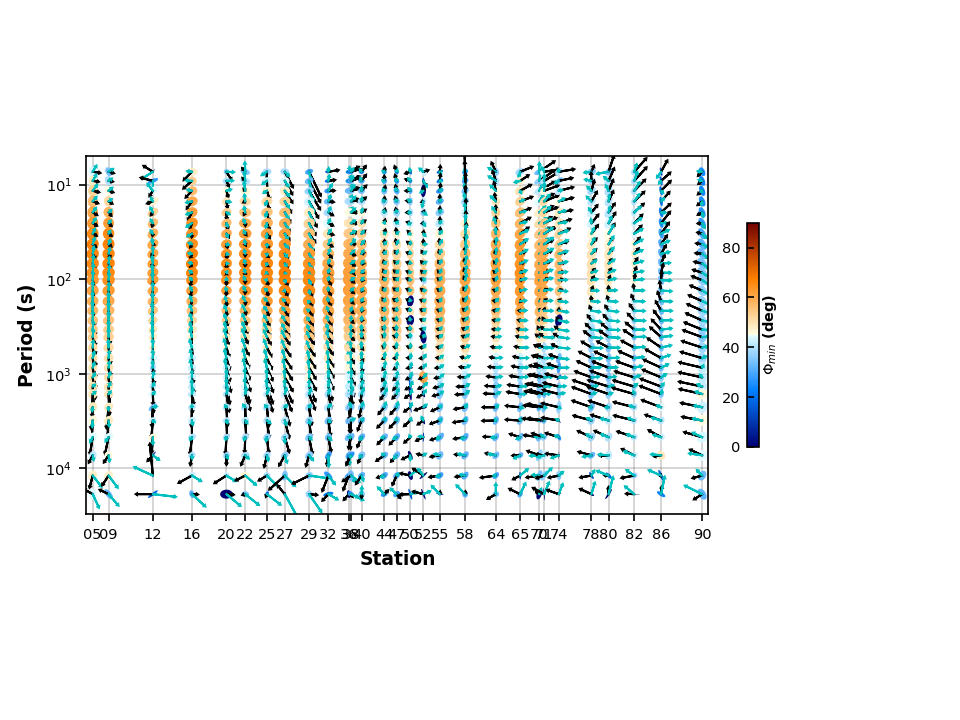

In [5]:
# the stretch in the y direction
plot_pt_pseudosection.y_stretch = 3000

# ellipse properties
plot_pt_pseudosection.ellipse_size = 400

# arrow properties
plot_pt_pseudosection.arrow_lw = .5
plot_pt_pseudosection.arrow_size = 1500
plot_pt_pseudosection.arrow_head_width = 50 

# station name index
plot_pt_pseudosection.station_id = [3, None]

# y limits for the period range
plot_pt_pseudosection.y_limits=(30000, 5)

# need a new figure number from the main, otherwise it updates that plot
plot_pt_pseudosection.fig_num = 3
plot_pt_pseudosection.redraw_plot()

### Shallow Observations
  
Shallow here is between 1 - 50 seconds

   - Looks like the Snake River Plane is filled with resistive material.
   - A possible fault between stations SR240 and SR244 as indicated by the induction vectors.  
   - Similarly, a possible fault between SR264 and SR265, both of these are near the edge of the range front.
   - A possible basin or conductive body to the north of the southern part of the line as indicated by the induction vectors.

2022-10-15T11:51:24 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/6efdd31d-f055-4291-a7fe-6b02c418bf19/6efdd31d-f055-4291-a7fe-6b02c418bf19.tif' not recognized as a supported file format."


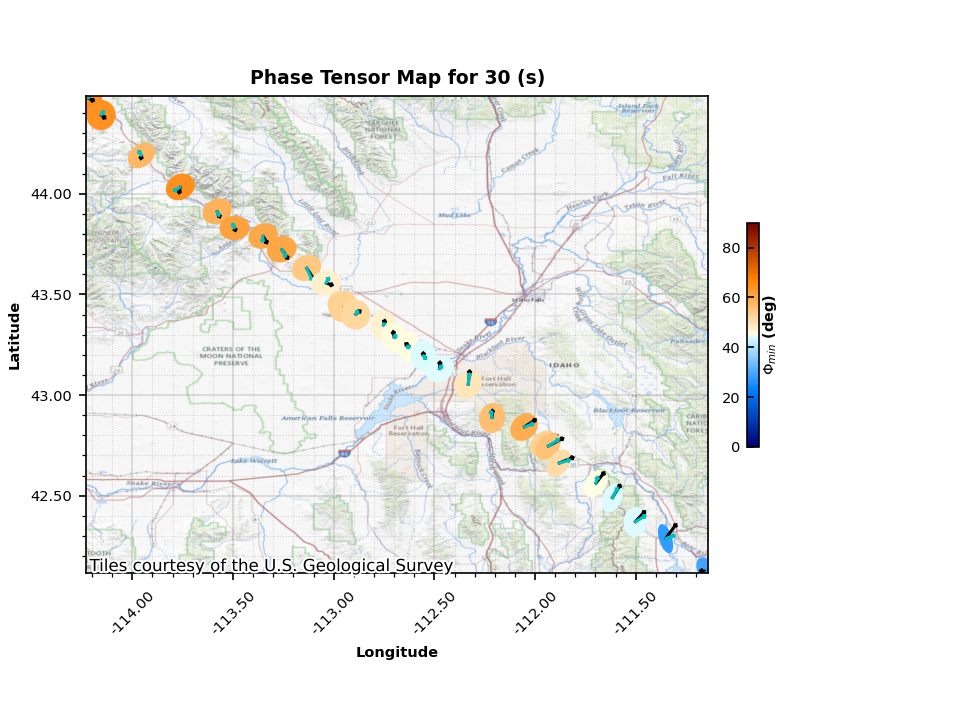

In [6]:
plot_stations = dgh_mt_data.plot_phase_tensor_map(
    plot_tipper="yri", 
    plot_period=30, 
    fig_num=6,
    ellipse_size=.15,
    arrow_size=.30,
    arrow_head_width=.02,
    arrow_head_length=.01,
    arrow_lw=.005,
)

### Middle Observations
  
Shallow here is between 50 - 1000 seconds

   - The middle to lower crust is becomeing more conductive, with the more conductive bits being down the middle of the Snake River Plane as indicated by the induction vectors.  

2022-10-15T11:51:33 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/27bf2620-6f29-4ce9-bf27-ce180fec83d7/27bf2620-6f29-4ce9-bf27-ce180fec83d7.tif' not recognized as a supported file format."


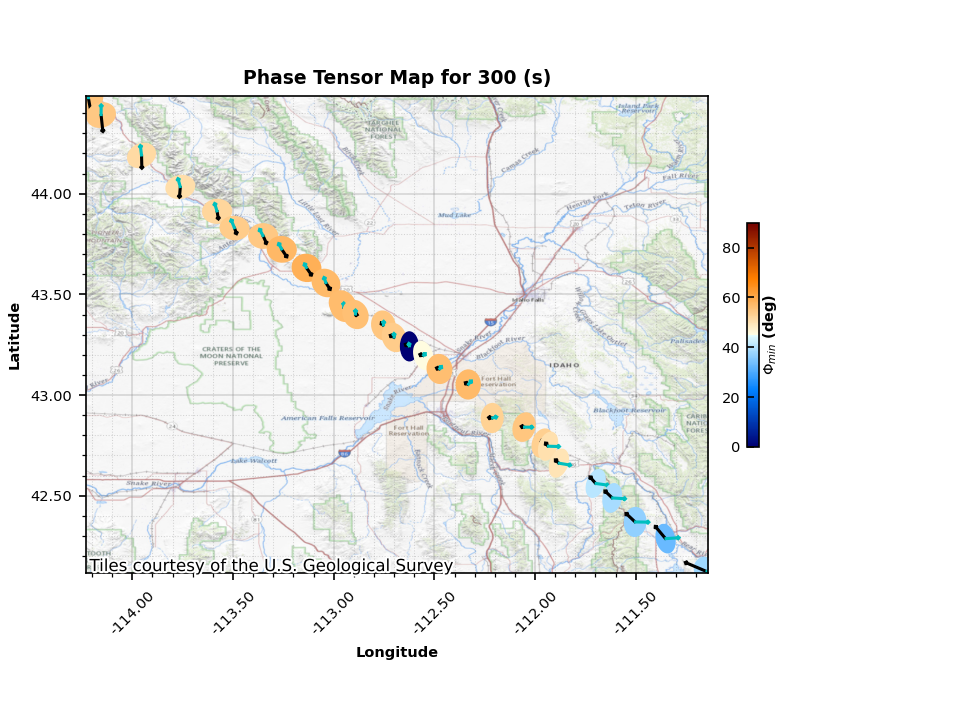

In [7]:
plot_stations.plot_period = 300
plot_stations.fig_num = 7
plot_stations.redraw_plot()

### Lower Observations
  
Shallow here is between 1000 - 30000 seconds

   - There appears to be a strong northeast trending conductive zone in the lower crust to upper mantle, as highlighted by the induction vectors.    

2022-10-15T11:51:40 [line 140] rasterio._env.open - INFO: GDAL signalled an error: err_no=4, msg="`/vsimem/4485ef0d-b3c1-4736-a890-1e13088279a0/4485ef0d-b3c1-4736-a890-1e13088279a0.tif' not recognized as a supported file format."


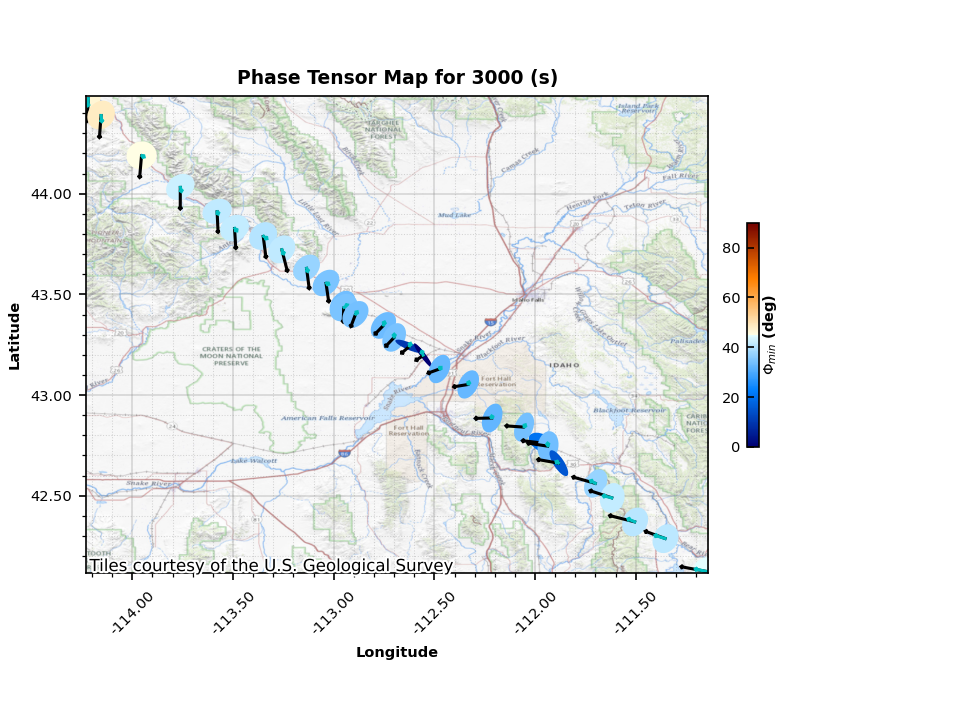

In [8]:
plot_stations.plot_period = 3000
plot_stations.fig_num = 8
plot_stations.redraw_plot()

## Close MTCollection

In [9]:
mc.close_collection()

2022-10-15 11:52:18,695 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mt_examples\data\transfer_functions\yellowstone_mt_collection.h5
